In [1]:
# This is to develop the code the generate contrast curves
# in the lambda/B regime from the KS analysis done on the 
# ADI frames

# Created 2020 May 28 by E.S.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as tri

%matplotlib inline

In [10]:
df = pd.read_csv("data/test_lambda_over_b_1.csv")

In [5]:
df.keys()

Index(['Unnamed: 0', 'dist_asec', 'comp_ampl',
       'D_xsec_strip_w_planets_rel_to_strip_0',
       'D_xsec_strip_w_planets_rel_to_strip_1',
       'D_xsec_strip_w_planets_rel_to_strip_2',
       'D_xsec_strip_w_planets_rel_to_strip_3',
       'D_xsec_strip_w_planets_rel_to_strip_4',
       'val_xsec_crit_strip_w_planets_rel_to_strip_0',
       'val_xsec_crit_strip_w_planets_rel_to_strip_1',
       'val_xsec_crit_strip_w_planets_rel_to_strip_2',
       'val_xsec_crit_strip_w_planets_rel_to_strip_3',
       'val_xsec_crit_strip_w_planets_rel_to_strip_4'],
      dtype='object')

In [6]:
# print out a plot, so that the user can see level of completion 
# represented by the files available

plt.clf()
plt.scatter(df["dist_asec"],df["comp_ampl"])
plt.show()

In [7]:
# make a new DataFrame from a subset of the data
# contour_data = df[["dist_asec","comp_ampl","D_xsec_strip_w_planets_rel_to_strip_1"]]
contour_data = df

# initialize cube to hold the KS statistic
cube_stat = np.zeros((4,len(contour_data["comp_ampl"].unique()),len(contour_data["dist_asec"].unique())))

for i in range(1,5):
    
    # which stripes are we comparing with?
    if (i==1):
        comparison_string = 'D_xsec_strip_w_planets_rel_to_strip_1'
    elif (i==2):
        comparison_string = 'D_xsec_strip_w_planets_rel_to_strip_2'
    elif (i==3):
        comparison_string = 'D_xsec_strip_w_planets_rel_to_strip_3'
    elif (i==4):
        comparison_string = 'D_xsec_strip_w_planets_rel_to_strip_4'
    
    # arrange 1-D arrangement of KS statistics into a matrix
    Z = contour_data.pivot_table(index='dist_asec', 
                                 columns='comp_ampl', 
                                 values=comparison_string).T.values

    X_unique = np.sort(contour_data.dist_asec.unique())
    Y_unique = np.sort(contour_data.comp_ampl.unique())
    X, Y = np.meshgrid(X_unique, Y_unique)
    
    # add this slice to cube
    cube_stat[i-1,:,:] = Z

    # plot
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # underplot scatter plot of sampled points
    sp = ax.scatter(contour_data["dist_asec"],contour_data["comp_ampl"], s=1)

    # plot a contour plot
    cp1 = ax.contour(X, Y, Z)

    # overplot the critical line
    df_levels = df.drop_duplicates(subset="val_xsec_crit_strip_w_planets_rel_to_strip_1", 
                                   keep='first', 
                                   inplace=False)
    levels = df_levels["val_xsec_crit_strip_w_planets_rel_to_strip_1"].values
    cp2 = ax.contour(X, Y, Z, levels = levels)

    ax.set_xlabel("dist_asec")
    ax.set_ylabel("companion_ampl")

    plt.show()
    #plt.savefig("junk_comp_w_4.pdf")

<Figure size 432x288 with 0 Axes>

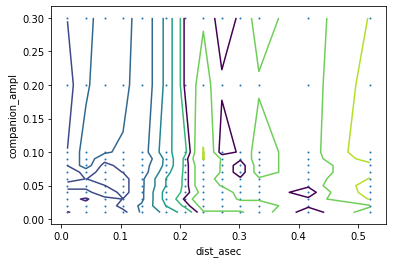

0      0.047170
1      0.066038
2      0.056604
3      0.066038
4      0.103774
         ...   
151    0.179245
152    0.188679
153    0.207547
154    0.188679
155    0.226415
Name: D_xsec_strip_w_planets_rel_to_strip_1, Length: 156, dtype: float64
[[0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 ...
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]]
[[2.50000000e-04 2.50000000e-04 2.50000000e-04 ... 2.50000000e-04
  2.50000000e-04 2.50000000e-04]
 [2.60263329e-04 2.60263329e-04 2.60263329e-04 ... 2.60263329e-04
  2.60263329e-04 2.60263329e-04]
 [2.70948001e-04 2.70948001e-04 2.70948001e-04 ... 2.70948001e-04
  2.70948001e-04 2.70948001e-04]
 ...
 [6.9

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/matplotlib/contour.py:1171: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/matplotlib/contour.py:1200: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-pac

<Figure size 432x288 with 0 Axes>

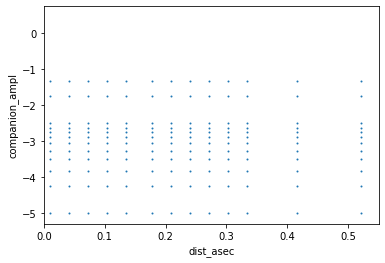

------------


<Figure size 432x288 with 0 Axes>

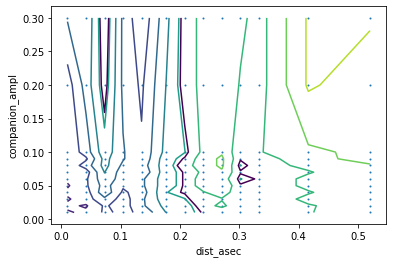

0      0.056604
1      0.066038
2      0.094340
3      0.084906
4      0.094340
         ...   
151    0.226415
152    0.216981
153    0.198113
154    0.273585
155    0.273585
Name: D_xsec_strip_w_planets_rel_to_strip_2, Length: 156, dtype: float64
[[0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 ...
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]]
[[2.50000000e-04 2.50000000e-04 2.50000000e-04 ... 2.50000000e-04
  2.50000000e-04 2.50000000e-04]
 [2.60263329e-04 2.60263329e-04 2.60263329e-04 ... 2.60263329e-04
  2.60263329e-04 2.60263329e-04]
 [2.70948001e-04 2.70948001e-04 2.70948001e-04 ... 2.70948001e-04
  2.70948001e-04 2.70948001e-04]
 ...
 [6.9

<Figure size 432x288 with 0 Axes>

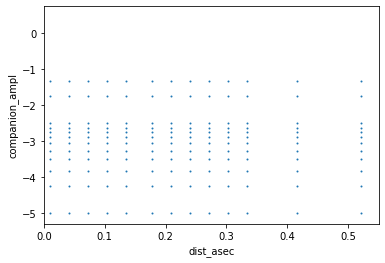

------------


<Figure size 432x288 with 0 Axes>

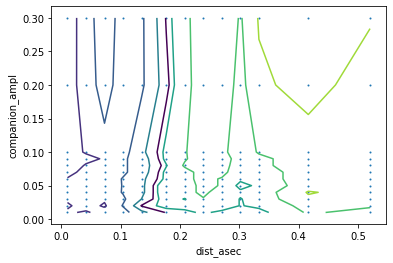

0      0.084906
1      0.075472
2      0.094340
3      0.103774
4      0.150943
         ...   
151    0.273585
152    0.235849
153    0.283019
154    0.301887
155    0.283019
Name: D_xsec_strip_w_planets_rel_to_strip_3, Length: 156, dtype: float64
[[0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 ...
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]]
[[2.50000000e-04 2.50000000e-04 2.50000000e-04 ... 2.50000000e-04
  2.50000000e-04 2.50000000e-04]
 [2.60263329e-04 2.60263329e-04 2.60263329e-04 ... 2.60263329e-04
  2.60263329e-04 2.60263329e-04]
 [2.70948001e-04 2.70948001e-04 2.70948001e-04 ... 2.70948001e-04
  2.70948001e-04 2.70948001e-04]
 ...
 [6.9

<Figure size 432x288 with 0 Axes>

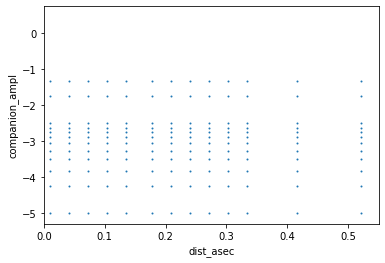

------------


<Figure size 432x288 with 0 Axes>

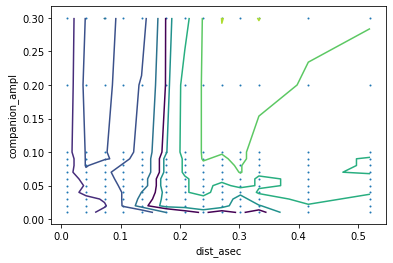

0      0.075472
1      0.066038
2      0.094340
3      0.094340
4      0.084906
         ...   
151    0.320755
152    0.311321
153    0.320755
154    0.292453
155    0.283019
Name: D_xsec_strip_w_planets_rel_to_strip_4, Length: 156, dtype: float64
[[0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 ...
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]
 [0.         0.00555556 0.01111111 ... 0.53888889 0.54444444 0.55      ]]
[[2.50000000e-04 2.50000000e-04 2.50000000e-04 ... 2.50000000e-04
  2.50000000e-04 2.50000000e-04]
 [2.60263329e-04 2.60263329e-04 2.60263329e-04 ... 2.60263329e-04
  2.60263329e-04 2.60263329e-04]
 [2.70948001e-04 2.70948001e-04 2.70948001e-04 ... 2.70948001e-04
  2.70948001e-04 2.70948001e-04]
 ...
 [6.9

<Figure size 432x288 with 0 Axes>

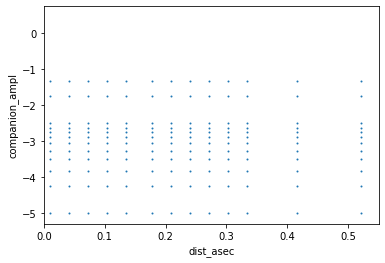

------------


In [39]:
## MAKE INTERPOLATION 
##

# make a new DataFrame from a subset of the data
# contour_data = df[["dist_asec","comp_ampl","D_xsec_strip_w_planets_rel_to_strip_1"]]
contour_data = df

# add column of delta_mags
contour_data["del_mag"] = 2.5*np.log10(contour_data["comp_ampl"])

# initialize cubes to hold the KS statistic
cube_stat = np.zeros((4,len(contour_data["comp_ampl"].unique()),len(contour_data["dist_asec"].unique())))

# interpolated cube
ngridx = 100
ngridy = 200
cube_stat_interp = np.zeros((4,ngridy,ngridx)) # the interpolated cube

for i in range(1,5):
    
    # which stripes are we comparing with?
    if (i==1):
        comparison_string = 'D_xsec_strip_w_planets_rel_to_strip_1'
    elif (i==2):
        comparison_string = 'D_xsec_strip_w_planets_rel_to_strip_2'
    elif (i==3):
        comparison_string = 'D_xsec_strip_w_planets_rel_to_strip_3'
    elif (i==4):
        comparison_string = 'D_xsec_strip_w_planets_rel_to_strip_4'
    
    # arrange 1-D arrangement of KS statistics into a matrix
    Z = contour_data.pivot_table(index='dist_asec', 
                                 columns='comp_ampl', 
                                 values=comparison_string).T.values

    X_unique = np.sort(contour_data.dist_asec.unique())
    Y_unique = np.sort(contour_data.comp_ampl.unique())
    X, Y = np.meshgrid(X_unique, Y_unique)
    
    # add this slice to cube
    cube_stat[i-1,:,:] = Z

    # plot
    plt.clf()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # underplot scatter plot of sampled points
    sp = ax.scatter(contour_data["dist_asec"],contour_data["comp_ampl"], s=1)
    # plot a contour plot
    cp1 = ax.contour(X, Y, Z)
    # overplot the critical line
    df_levels = df.drop_duplicates(subset="val_xsec_crit_strip_w_planets_rel_to_strip_1", 
                                   keep='first', 
                                   inplace=False)
    levels = df_levels["val_xsec_crit_strip_w_planets_rel_to_strip_1"].values
    cp2 = ax.contour(X, Y, Z, levels = levels)

    ax.set_xlabel("dist_asec")
    ax.set_ylabel("companion_ampl")

    plt.show()
    
    ################################################
    ## now do the same, with an interpolated cube
    ## is this really necessary, though??
    
    # linearly interpolate the data we have onto a regular grid in magnitude space
    xi = np.linspace(0, 0.55, ngridx)
    yi = 2.5*np.logspace(np.log10(0.0001), np.log10(0.3), num=ngridy, endpoint=True, base=10.0) # mags
    #print(contour_data[comparison_string].values)
    
    '''
    # Perform linear interpolation of the data (x,y)
    # on a grid defined by (xi,yi)
    triang = tri.Triangulation(x, y)
    interpolator = tri.LinearTriInterpolator(triang, z)
    Xi, Yi = np.meshgrid(xi, yi)
    zi = interpolator(Xi, Yi)
    '''
    
    
    # Linearly interpolate the data (X, Y) on a grid defined by (xi, yi).
    triang_mag = tri.Triangulation(contour_data["dist_asec"].values, 
                               contour_data["del_mag"].values)
    interpolator = tri.LinearTriInterpolator(triang_mag, contour_data[comparison_string].values)
    Xi, Yi = np.meshgrid(xi, yi)
    zi = interpolator(Xi, Yi)
    print(contour_data[comparison_string])
    print(Xi)
    print(Yi)
    #plt.savefig("junk_comp_w_4.pdf")
    
    # add this slice to cube
    cube_stat_interp[i-1,:,:] = zi
    print(zi)

    # plot
    plt.clf()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # underplot scatter plot of sampled points
    sp = ax.scatter(contour_data["dist_asec"],contour_data["del_mag"], s=1)
    # plot a contour plot
    cp1 = ax.contour(Xi, Yi, zi)
    # overplot the critical line
    df_levels = df.drop_duplicates(subset="val_xsec_crit_strip_w_planets_rel_to_strip_1", 
                                   keep='first', 
                                   inplace=False)
    levels = df_levels["val_xsec_crit_strip_w_planets_rel_to_strip_1"].values
    cp2 = ax.contour(Xi, Yi, zi, levels = levels)

    ax.set_xlabel("dist_asec")
    ax.set_ylabel("companion_ampl")

    plt.show()
    
    print("------------")

In [5]:
# take an average across the cube

cube_stat_avg = np.mean(cube_stat, axis=0)

In [31]:
 2.5*np.log10(contour_data["comp_ampl"].values)

array([-5.        , -5.        , -5.        , -5.        , -5.        ,
       -5.        , -5.        , -5.        , -5.        , -5.        ,
       -5.        , -5.        , -5.        , -4.24742501, -4.24742501,
       -4.24742501, -4.24742501, -4.24742501, -4.24742501, -4.24742501,
       -4.24742501, -4.24742501, -4.24742501, -4.24742501, -4.24742501,
       -4.24742501, -3.80719686, -3.80719686, -3.80719686, -3.80719686,
       -3.80719686, -3.80719686, -3.80719686, -3.80719686, -3.80719686,
       -3.80719686, -3.80719686, -3.80719686, -3.80719686, -3.49485002,
       -3.49485002, -3.49485002, -3.49485002, -3.49485002, -3.49485002,
       -3.49485002, -3.49485002, -3.49485002, -3.49485002, -3.49485002,
       -3.49485002, -3.49485002, -3.25257499, -3.25257499, -3.25257499,
       -3.25257499, -3.25257499, -3.25257499, -3.25257499, -3.25257499,
       -3.25257499, -3.25257499, -3.25257499, -3.25257499, -3.25257499,
       -3.05462187, -3.05462187, -3.05462187, -3.05462187, -3.05

In [34]:
yi

array([2.50000000e-04, 2.60263329e-04, 2.70948001e-04, 2.82071314e-04,
       2.93651277e-04, 3.05706635e-04, 3.18256905e-04, 3.31322406e-04,
       3.44924289e-04, 3.59084574e-04, 3.73826186e-04, 3.89172990e-04,
       4.05149831e-04, 4.21782574e-04, 4.39098147e-04, 4.57124581e-04,
       4.75891060e-04, 4.95427966e-04, 5.15766926e-04, 5.36940868e-04,
       5.58984070e-04, 5.81932218e-04, 6.05822465e-04, 6.30693485e-04,
       6.56585543e-04, 6.83540555e-04, 7.11602161e-04, 7.40815788e-04,
       7.71228731e-04, 8.02890227e-04, 8.35851532e-04, 8.70166007e-04,
       9.05889206e-04, 9.43078960e-04, 9.81795477e-04, 1.02210144e-03,
       1.06406209e-03, 1.10774536e-03, 1.15322198e-03, 1.20056557e-03,
       1.24985276e-03, 1.30116336e-03, 1.35458043e-03, 1.41019044e-03,
       1.46808343e-03, 1.52835313e-03, 1.59109709e-03, 1.65641690e-03,
       1.72441830e-03, 1.79521139e-03, 1.86891076e-03, 1.94563574e-03,
       2.02551054e-03, 2.10866446e-03, 2.19523213e-03, 2.28535368e-03,
      

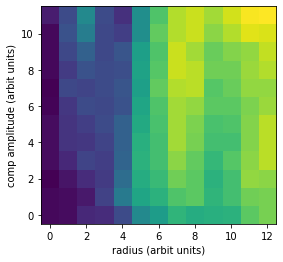

In [16]:
# FYI 2D color plot
'''
plt.imshow(cube_stat_avg, origin="lower")
plt.xlabel("radius (arbit units)")
plt.ylabel("comp amplitude (arbit units)")
plt.show()
'''

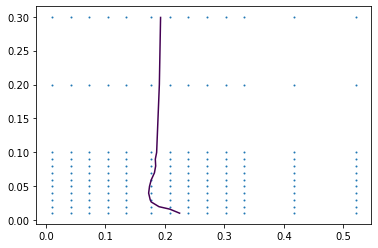

In [7]:
# FYI linear contrast curve 

'''
levels = df_levels["val_xsec_crit_strip_w_planets_rel_to_strip_1"].values
cp23 = plt.contour(X, Y, cube_stat_avg, levels = levels)
plt.scatter(df["dist_asec"],df["comp_ampl"], s=1)
'''

In [8]:
# map contrast curve to magnitudes

Y_mag = -2.5*np.log10(Y)
comp_ampl = -2.5*np.log10(df["comp_ampl"])

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'color'
  if __name__ == '__main__':
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'color'


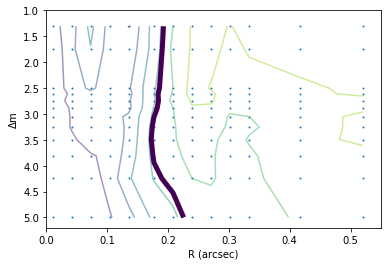

In [32]:
# generate 2D contour plots for each individual slice, and then for the average

levels = df_levels["val_xsec_crit_strip_w_planets_rel_to_strip_1"].values

for t in range(0,4):
    # loop over stripe comparisons
    plt.clf()
    cp3 = plt.contour(X, Y_mag, cube_stat[t,:,:], alpha = 0.5)
    cp4 = plt.contour(X, Y_mag, cube_stat[t,:,:], levels = levels, linewidths=5, color="k")
    plt.scatter(df["dist_asec"],comp_ampl, s=1)
    plt.gca().invert_yaxis()
    plt.xlabel("R (arcsec)")
    plt.ylabel("$\Delta$m")
    plt.xlim([0,0.55])
    plt.ylim([5.2,1])
    plt.savefig("contour_" + str(int(t)) + ".png")
    
# now plot the average
plt.clf()
cp3 = plt.contour(X, Y_mag, cube_stat_avg, alpha = 0.5)
cp4 = plt.contour(X, Y_mag, cube_stat_avg, levels = levels, linewidths=5, color="k")
plt.scatter(df["dist_asec"],comp_ampl, s=1)
plt.gca().invert_yaxis()
plt.xlabel("R (arcsec)")
plt.ylabel("$\Delta$m")
plt.xlim([0,0.55])
plt.ylim([5.2,1])
plt.savefig("contour_avg.png")

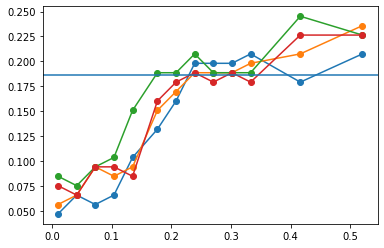

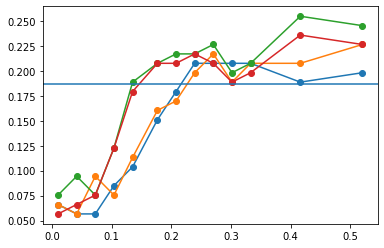

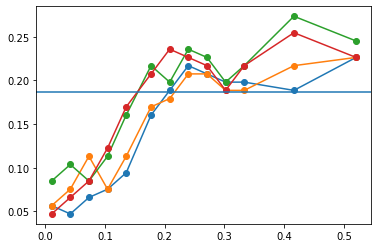

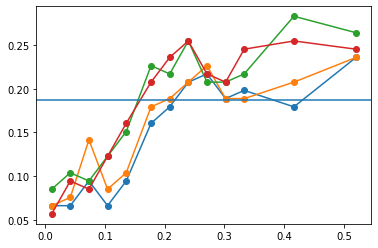

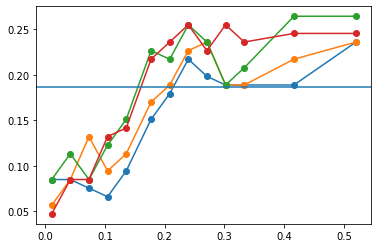

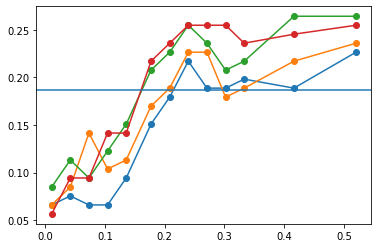

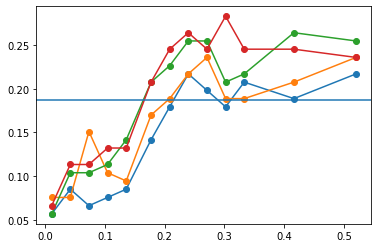

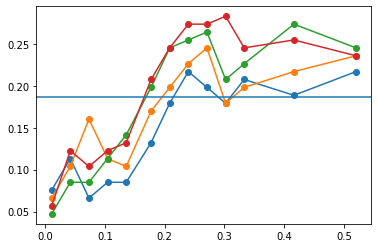

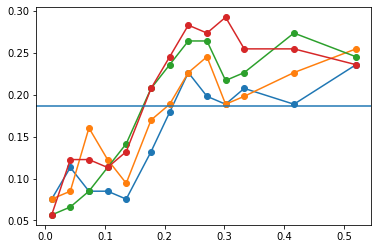

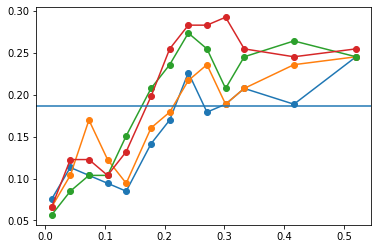

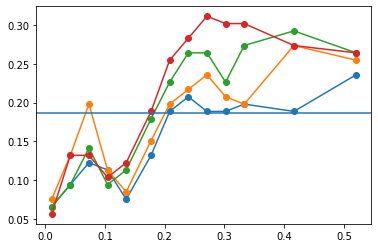

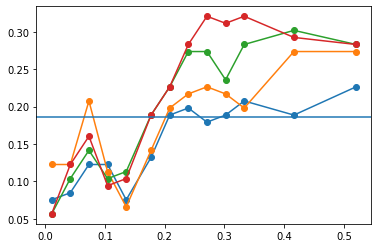

In [22]:
# make FYI scatter plots of KS statistic as function of radius, and overplot each 
# strip comparison for a given companion amplitude
'''
for i in range(0,np.shape(cube_stat)[1]):
    # loop over companion amplitudes
    plt.clf()
    for j in range(0,4):
        # loop over different stripe comparisons
        plt.plot(contour_data["dist_asec"].drop_duplicates(),cube_stat[j,i,:],marker="o")
    plt.axhline(y=df["val_xsec_crit_strip_w_planets_rel_to_strip_1"][0])
    plt.show()
'''